# **Asteroid Prediction**


# Import Python Libraries

In [79]:
#from google.colab import drive
#drive.mount('/content/drive')

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt

# Reading the Income Classification Dataset

In [81]:
#%cd /content/drive/My Drive/Data

In [82]:
df = pd.read_csv('Asteroid.csv',  on_bad_lines='skip')

C:\Users\gilad\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (11,14,15,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Column Renaming

In [83]:
readable_df = df.copy()
readable_df.rename(columns={"a": "semi-major axis",
                            "e": "eccentricity",
                            "G": "Magnitude slope parameter",
                            "i": "Inclination with ecliptic plane",
                            "om": "Longitude of the ascending node",
                            "w": "argument of perihelion",
                            "q": "perihelion distance(au)",
                            "ad": "aphelion distance(au)",
                            "per_y": "Orbital period",
                            "data_arc": "data arc-span(d)",
                            "condition_code": "Orbit condition code",
                            "n_obs_used": "number of observations used",
                            "H": "Absolute Magnitude parameter",
                            "condition_code": "Orbit condition code",
                            })

,full_name,semi-major axis,eccentricity,Magnitude slope parameter,Inclination with ecliptic plane,Longitude of the ascending node,argument of perihelion,perihelion distance(au),aphelion distance(au),Orbital period,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.594780
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.233240
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.034540
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.139480
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.095890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839731,(6344 P-L),2.812945,0.664688,NaN,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,0.032397
839732,(1168 T-2),2.645238,0.259376,NaN,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0.956145
839733,(2060 T-2),2.373137,0.202053,NaN,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0.893896
839734,(2678 T-3),2.260404,0.258348,NaN,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,N,0.680220


In [84]:
readable_df.head()

,full_name,a,e,G,i,om,w,q,ad,per_y,...,rot_per,GM,BV,UB,IR,spec_B,spec_T,neo,pha,moid
0,1 Ceres,2.769165,0.076009,0.12,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,...,9.074170,62.6284,0.713,0.426,NaN,C,G,N,N,1.59478
1,2 Pallas,2.772466,0.230337,0.11,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,...,7.813200,14.3000,0.635,0.284,NaN,B,B,N,N,1.23324
2,3 Juno,2.669150,0.256942,0.32,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,...,7.210000,NaN,0.824,0.433,NaN,Sk,S,N,N,1.03454
3,4 Vesta,2.361418,0.088721,0.32,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,...,5.342128,17.8000,0.782,0.492,NaN,V,V,N,N,1.13948
4,5 Astraea,2.574249,0.191095,NaN,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,...,16.806000,NaN,0.826,0.411,NaN,S,S,N,N,1.09589


# **Exploration (EDA) & Visualization**

In [85]:
readable_df.shape

(839736, 27)

In [86]:
readable_df.isna().sum()

full_name              0
a                      2
e                      0
G                 839617
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15789
condition_code       993
n_obs_used             0
H                   2694
diameter          702055
extent            839718
albedo            703284
rot_per           820940
GM                839722
BV                838715
UB                838757
IR                839735
spec_B            838070
spec_T            838756
neo                    6
pha                16922
moid               16922
dtype: int64

In [87]:
readable_df = readable_df.dropna(axis=0, subset=['diameter'])
readable_df.shape

(137681, 27)

In [88]:
readable_df.isna().sum()

full_name              0
a                      0
e                      0
G                 137562
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             140
condition_code         0
n_obs_used             0
H                    751
diameter               0
extent            137665
albedo              1232
rot_per           126493
GM                137667
BV                136676
UB                136716
IR                137680
spec_B            136311
spec_T            136716
neo                    0
pha                    0
moid                   0
dtype: int64

In [89]:
cleaned_df = readable_df.drop(["G", 'spec_T', 'spec_B', "IR", "UB",
                               "BV", "GM", "rot_per", "extent"], axis=1)
cleaned_df.isna().sum()

full_name            0
a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc           140
condition_code       0
n_obs_used           0
H                  751
diameter             0
albedo            1232
neo                  0
pha                  0
moid                 0
dtype: int64

In [90]:
cleaned_df.shape

(137681, 18)

In [91]:
cleaned_df = cleaned_df.dropna()
cleaned_df.shape

(136044, 18)

In [92]:
cleaned_df.isna().sum()

full_name         0
a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
diameter          0
albedo            0
neo               0
pha               0
moid              0
dtype: int64

In [93]:
cleaned_df.dtypes

full_name          object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
diameter           object
albedo            float64
neo                object
pha                object
moid              float64
dtype: object

In [94]:
cleaned_df = cleaned_df.drop(['full_name'], axis=1)
cleaned_df.dtypes

In [96]:
real_diameter_df = cleaned_df.astype({'diameter': 'float64', "condition_code": "int32"})
real_diameter_df.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code      int32
n_obs_used          int64
H                 float64
diameter          float64
albedo            float64
neo                object
pha                object
moid              float64
dtype: object

In [76]:
real_diameter_df.shape

(136044, 17)

## Dealing with Categorical variables
### neo and pha

In [97]:
categorical_data = real_diameter_df.select_dtypes(include=['object']).copy()
new_columns = pd.get_dummies(categorical_data, columns=['neo','pha'], drop_first=True)
new_columns

,neo_Y,pha_Y
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
797871,0,0
797896,0,0
798113,0,0
799788,0,0


In [102]:
real_diameter_df = real_diameter_df.drop(['neo' , 'pha'], axis = 1)

In [103]:
model_df = pd.concat([real_diameter_df, new_columns], axis=1)
model_df.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,diameter,albedo,moid,neo_Y,pha_Y
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,939.400,0.0900,1.59478,0,0
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,545.000,0.1010,1.23324,0,0
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,246.596,0.2140,1.03454,0,0
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,525.400,0.4228,1.13948,0,0
4,2.574249,0.191095,5.366988,141.576604,358.687608,2.082324,3.066174,4.130323,63431.0,0,2861,6.85,106.699,0.2740,1.09589,0,0


In [104]:
model_df.dtypes

a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code      int32
n_obs_used          int64
H                 float64
diameter          float64
albedo            float64
moid              float64
neo_Y               uint8
pha_Y               uint8
dtype: object

# Asteroids


*   **imbalanced data**



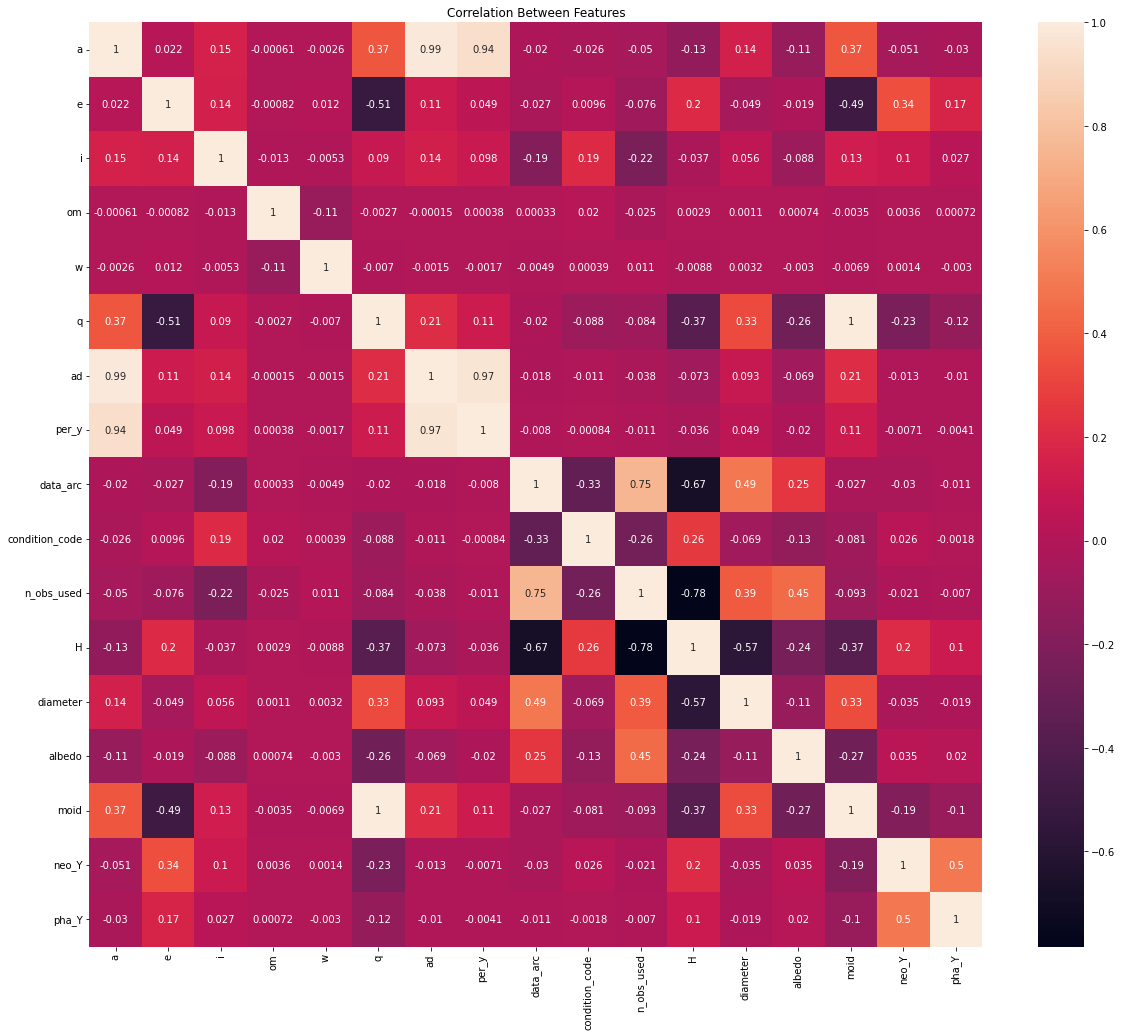

In [105]:
plt.figure(figsize=(20,17))
cor = model_df.corr()
sns.heatmap(model_df.corr(method='pearson'),annot=True)
plt.title("Correlation Between Features")
plt.show()

In [108]:
model_df['diameter'].value_counts()

4.017     45
3.111     44
3.296     44
3.537     44
3.126     44
          ..
10.787     1
18.379     1
1.052      1
18.494     1
1.077      1
Name: diameter, Length: 16596, dtype: int64

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = model_df['diameter']
X = model_df.drop('diameter', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

In [112]:
multi_reg = LinearRegression()
multi_reg.fit(X_train , y_train)
pred = multi_reg.predict(X_test)

In [113]:
print('Training Accuracy : ' , multi_reg.score(X_train, y_train))
print('Test Accuracy : ' , multi_reg.score(X_test, y_test))

Training Accuracy :  0.4944891684467058
Test Accuracy :  0.36855821339068556


## Random Forest Regression

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
print('Training Accuracy : ' , multi_reg.score(X_train, y_train))
print('Test Accuracy : ' , multi_reg.score(X_test, y_test))